In [85]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [86]:
import pandas as pd # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore
from sklearn.preprocessing import MinMaxScaler, StandardScaler # type: ignore
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, cross_validate # type: ignore
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix # type: ignore
from xgboost import plot_importance # type: ignore
from xgboost import XGBClassifier # type: ignore

In [87]:
# Load the dataset
file_path = 'train.csv'
dataset = pd.read_csv(file_path)

# Display the first few rows and basic info of the dataset
dataset.info()
dataset.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             1995 non-null   float64
 5   four_g         1995 non-null   float64
 6   int_memory     1995 non-null   float64
 7   m_dep          1995 non-null   float64
 8   mobile_wt      1996 non-null   float64
 9   n_cores        1996 non-null   float64
 10  pc             1995 non-null   float64
 11  px_height      1996 non-null   float64
 12  px_width       1998 non-null   float64
 13  ram            1998 non-null   float64
 14  sc_h           1999 non-null   float64
 15  sc_w           1999 non-null   float64
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1.0,0.0,7.0,0.6,188.0,2.0,...,20.0,756.0,2549.0,9.0,7.0,19,0,0,1,1
1,1021,1,0.5,1,0.0,1.0,53.0,0.7,136.0,3.0,...,905.0,1988.0,2631.0,17.0,3.0,7,1,1,0,2
2,563,1,0.5,1,2.0,1.0,41.0,0.9,145.0,5.0,...,1263.0,1716.0,2603.0,11.0,2.0,9,1,1,0,2
3,615,1,2.5,0,0.0,0.0,10.0,0.8,131.0,6.0,...,1216.0,1786.0,2769.0,16.0,8.0,11,1,0,0,2
4,1821,1,1.2,0,13.0,1.0,44.0,0.6,141.0,2.0,...,1208.0,1212.0,1411.0,8.0,2.0,15,1,1,0,1


In [88]:
dataset.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,1995.000000,1995.000000,1995.000000,1995.000000,1996.000000,1996.000000,...,1996.000000,1998.000000,1998.000000,1999.000000,1999.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.310276,0.521303,32.048120,0.502256,140.266533,4.518036,...,644.651804,1251.287788,2124.262262,12.303652,5.766383,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.335766,0.499671,18.146476,0.288530,35.384676,2.288946,...,443.355443,432.352930,1085.273372,4.212373,4.357400,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.000000,874.250000,1206.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2147.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3065.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


- Numerical Features: battery_power, clock_speed, fc (front camera megapixels), int_memory (internal memory in GB), etc.
- Categorical/Binary Features: blue (Bluetooth on/off), dual_sim (dual SIM on/off), three_g, four_g, touch_screen, etc.
- Target Variable: price_range, which classify phones into different price categories.

Missing Values: Some columns have missing values, like fc, four_g, int_memory, mobile_wt, etc.

In [89]:
# Impute missing values using the median of each column
dataset_imputed = dataset.fillna(dataset.median())

# Verify that there are no more missing values
missing_data_after_imputation = dataset_imputed.isnull().sum()

missing_data_after_imputation

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

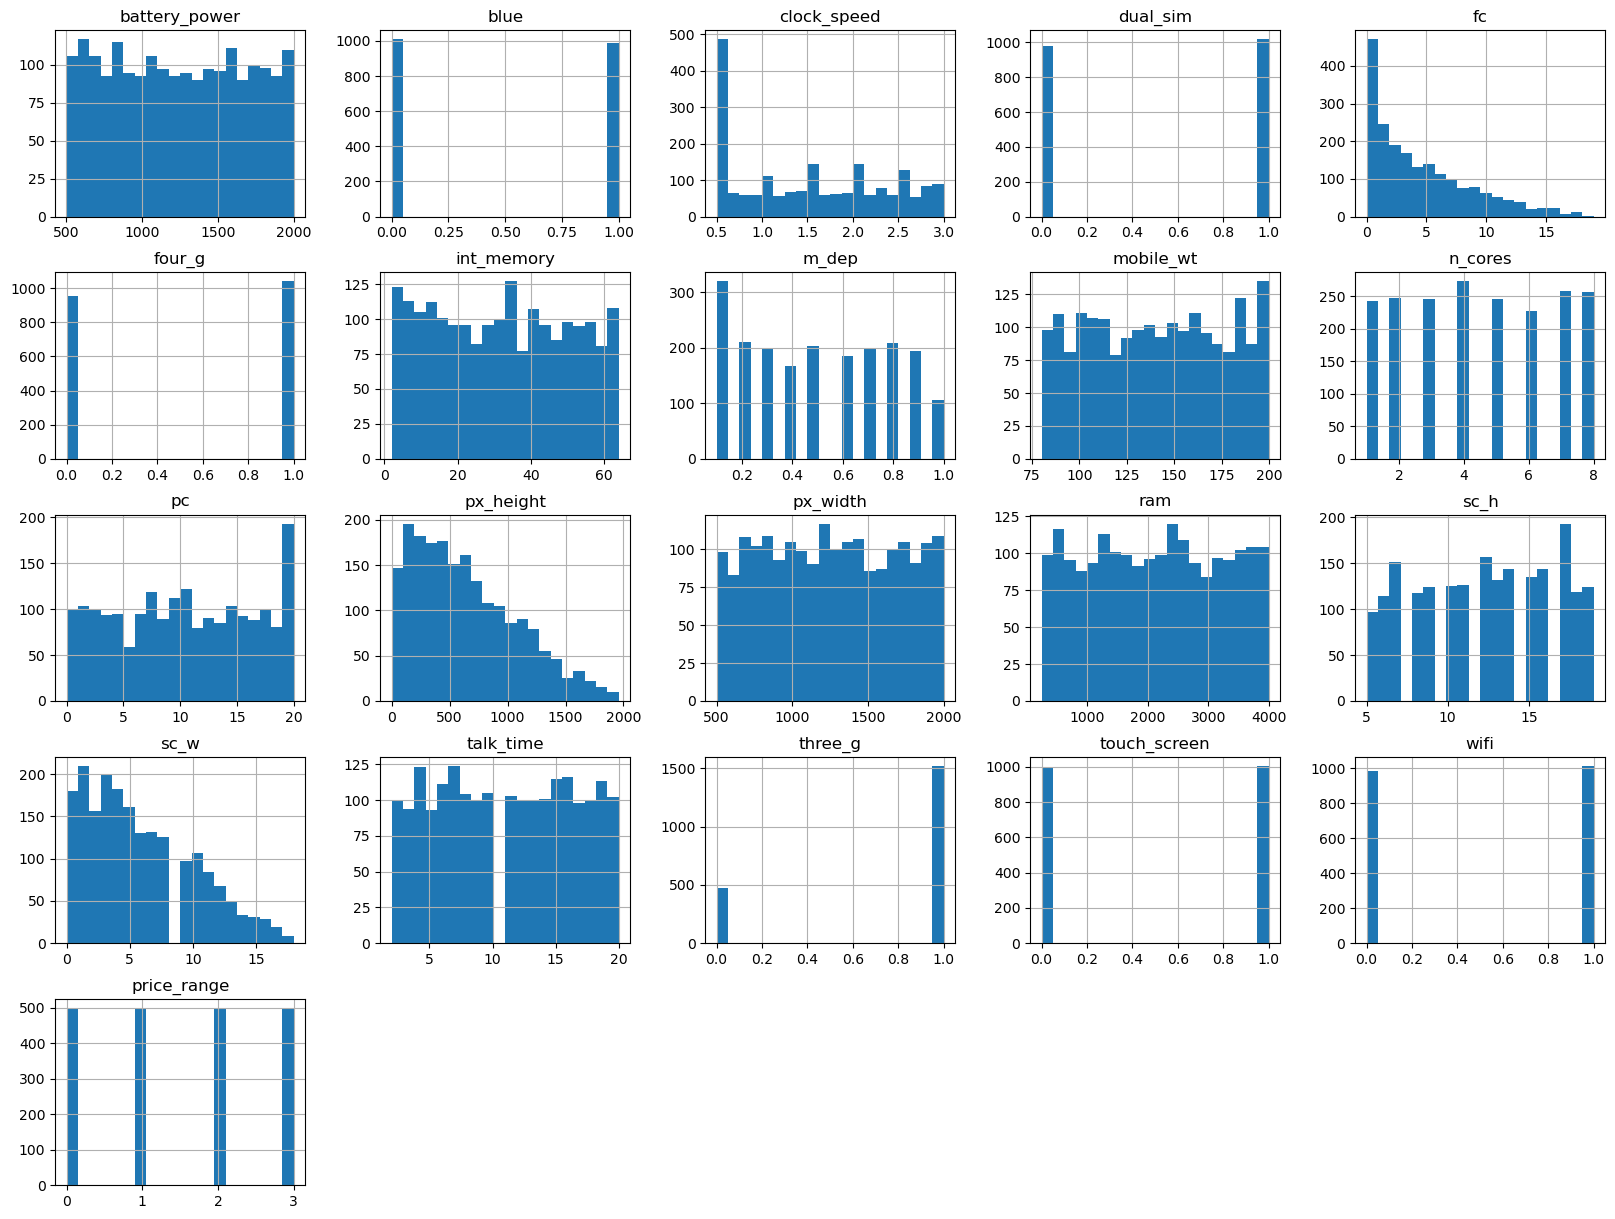

In [90]:
# Plot histograms for all numerical columns
dataset.hist(bins=20, figsize=(20, 15))
plt.show()

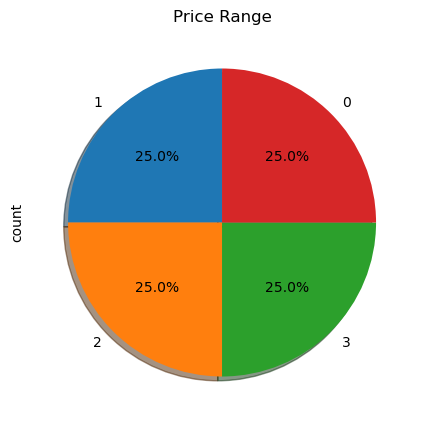

In [91]:
# Pie plot for price_range
plt.figure(figsize=(5, 5))
dataset['price_range'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Price Range')
plt.show()

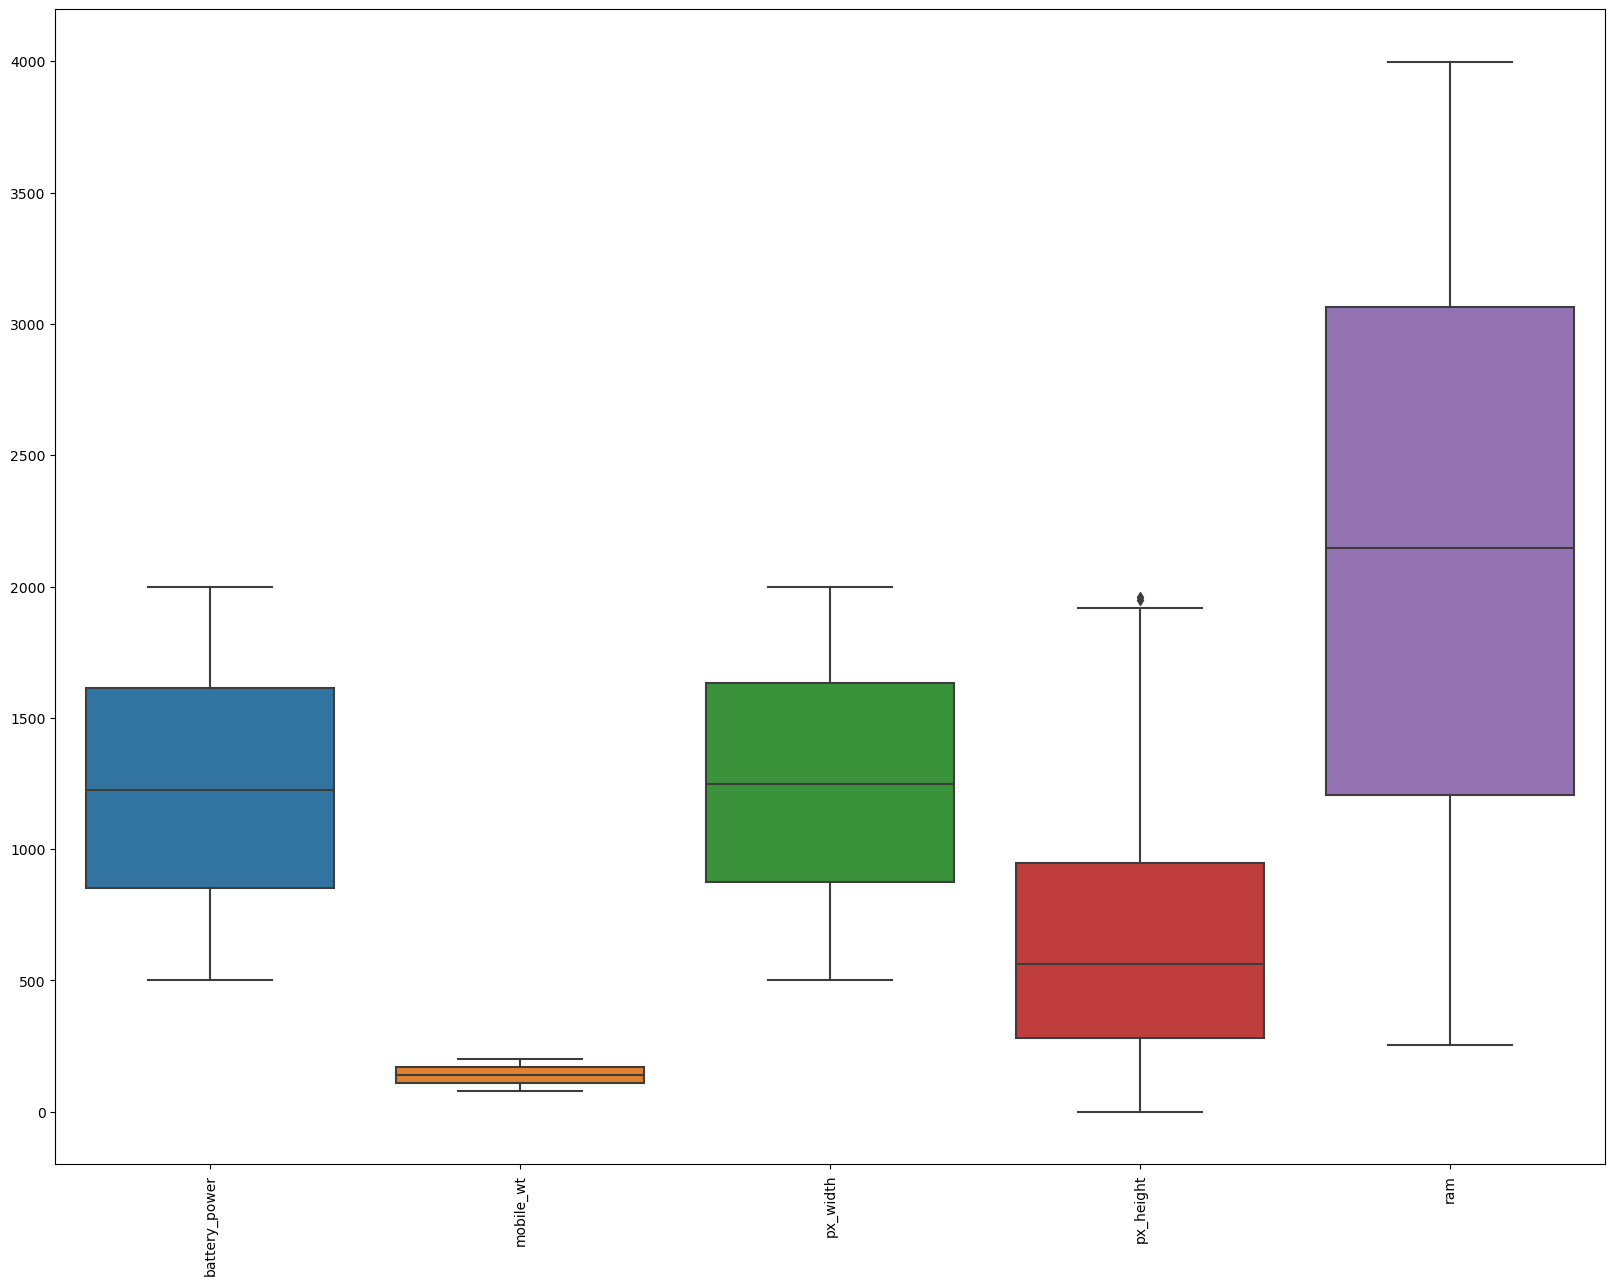

In [92]:
# Select specific columns for analysis
columns_to_analyze = ['battery_power', 'mobile_wt' , 'px_width', 'px_height', 'ram']

# Plot box plots for all numerical columns
plt.figure(figsize=(20, 15))
sns.boxplot(data=dataset[columns_to_analyze])
plt.xticks(rotation=90)
plt.show()

In [93]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = dataset['px_height'].quantile(0.25)
Q3 = dataset['px_height'].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
filtered_dataset = dataset[(dataset['px_height'] >= lower_bound) & (dataset['px_height'] <= upper_bound)]

# Display the number of rows before and after removing outliers
print(f"Original number of rows: {len(dataset)}")
print(f"Number of rows after removing outliers: {len(filtered_dataset)}")
dataset = filtered_dataset

Original number of rows: 2000
Number of rows after removing outliers: 1994


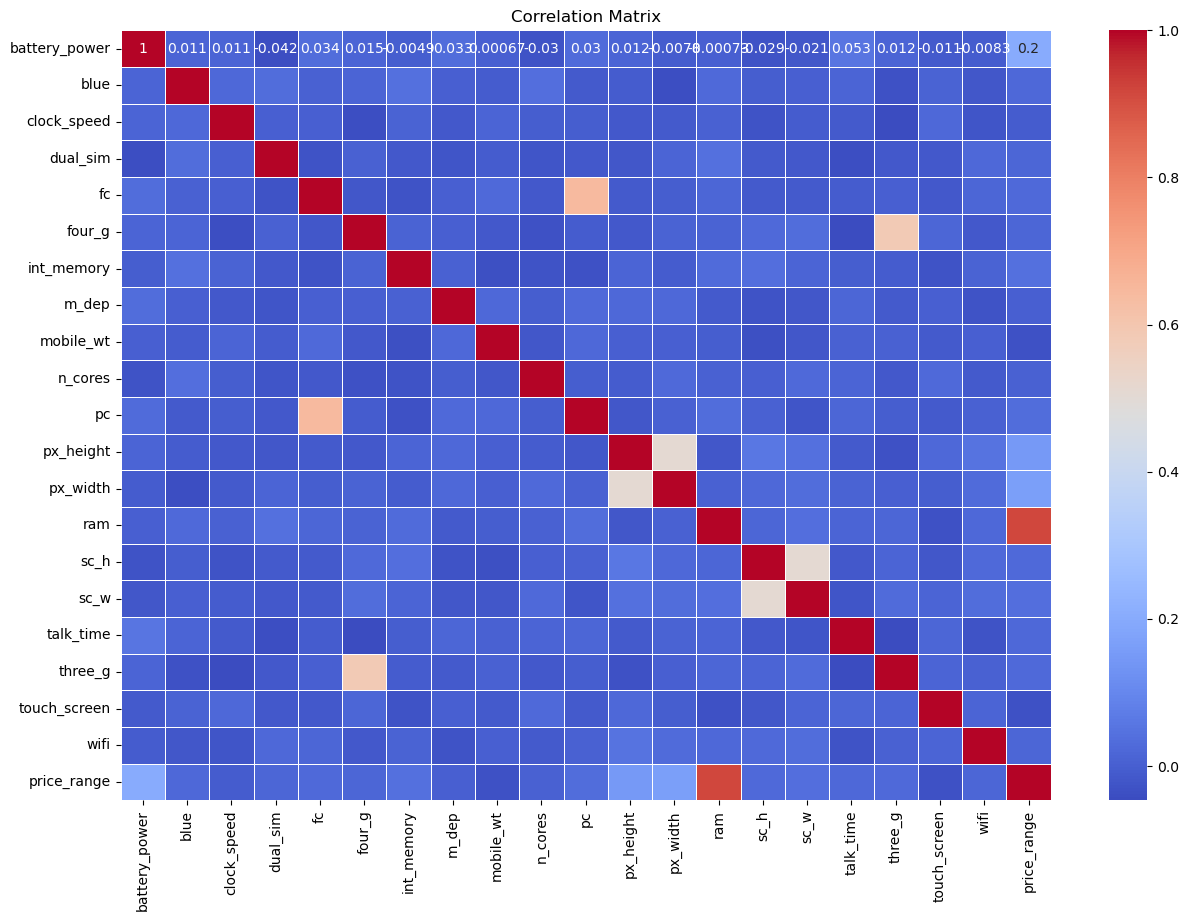

price_range      1.000000
ram              0.917825
battery_power    0.199683
px_width         0.164353
px_height        0.146254
int_memory       0.041344
sc_w             0.037543
pc               0.035523
fc               0.024991
three_g          0.022894
sc_h             0.021399
talk_time        0.020603
blue             0.020163
dual_sim         0.018413
wifi             0.017503
four_g           0.014469
n_cores          0.004077
m_dep           -0.000616
clock_speed     -0.004499
touch_screen    -0.030932
mobile_wt       -0.031897
Name: price_range, dtype: float64

In [94]:
# Set up the visualization style
#sns.set(style="whitegrid")

# Plot distributions for some key numerical features
#fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 15))

# List of features to visualize
#features = ['battery_power', 'clock_speed', 'int_memory', 'mobile_wt', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w']

# Plot histograms
#for i, feature in enumerate(features):
#    sns.histplot(dataset_imputed[feature], kde=True, ax=axes[i//3, i%3])
#    axes[i//3, i%3].set_title(f'Distribution of {feature}')

#plt.tight_layout()
#plt.show()

# Correlation matrix to see relationships between numerical features
plt.figure(figsize=(15, 10))
corr_matrix = dataset_imputed.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

corr_matrix = dataset.corr()['price_range'].sort_values(ascending=False)
corr_matrix

Key Features Affecting Price Range:
- RAM (Correlation: 0.918): The most significant feature positively correlated with the price range. Devices with higher RAM are typically more expensive.
- Battery Power (Correlation: 0.200): Shows a moderate positive relationship with price range. Higher battery capacity tends to be associated with higher-end devices.
- Pixel Width and Height (Correlation: 0.164 and 0.146): These are moderately correlated, indicating that screen resolution contributes somewhat to the price, but not as strongly as RAM.

Lesser-Impact Features:
- Internal Memory (Correlation: 0.041): Has a minor positive influence, suggesting that storage alone is not a strong determinant of price.
- Screen Dimensions (Width: 0.038, Height: 0.021): Screen size has a negligible impact on price.
- Primary and Front Camera (Correlation: 0.036 and 0.025): Camera resolution has a minor role in determining the price range.
- 3G and 4G Support (Correlation: 0.023 and 0.014): Network support has minimal influence, likely because most devices in this dataset support these features.

Negatively Correlated Features:
- Touch Screen (Correlation: -0.031): A small negative correlation suggests that touch screen support alone doesn’t drive higher prices.
- Mobile Weight (Correlation: -0.032): Indicates that heavier devices are slightly associated with lower price ranges.

Uncorrelated or Weakly Correlated Features:
- Features like the number of cores, clock speed, depth, and dual SIM support show almost no correlation with the price range.

Visual Distribution Insight:
- Features like RAM and battery power are more skewed toward higher values in pricier devices, while features like weight, screen size, and internal memory might be more evenly distributed across price ranges.

In [95]:
# Nomralization for Data to not be biased

# Select the features you want to normalize
features_to_normalize = ['battery_power', 'clock_speed', 'int_memory', 'm_dep', 'mobile_wt', 
                        'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 
                        'talk_time']

# 1. Min-Max Scaling
min_max_scaler = MinMaxScaler()
dataset[features_to_normalize] = min_max_scaler.fit_transform(dataset[features_to_normalize])

# 2. Z-Score Standardization
standard_scaler = StandardScaler()
dataset[features_to_normalize] = standard_scaler.fit_transform(dataset[features_to_normalize])

print(dataset.head())

   battery_power  blue  clock_speed  dual_sim    fc  four_g  int_memory  \
0      -0.902257     0     0.831192         0   1.0     0.0   -1.381395   
1      -0.494816     1    -1.252968         1   0.0     1.0    1.155069   
2      -1.537318     1    -1.252968         1   2.0     1.0    0.493383   
3      -1.418955     1     1.198985         0   0.0     0.0   -1.215973   
4       1.326147     1    -0.394784         0  13.0     1.0    0.658805   

      m_dep  mobile_wt   n_cores  ...  px_height  px_width       ram  \
0  0.339122   1.347146 -1.098157  ...  -1.411800 -1.144409  0.391319   
1  0.685555  -0.121931 -0.661482  ...   0.592639  1.709188  0.466857   
2  1.378422   0.132332  0.211867  ...   1.403474  1.079173  0.441064   
3  1.031988  -0.263189  0.648542  ...   1.297024  1.241310  0.593981   
4  0.339122   0.019326 -1.098157  ...   1.278904 -0.088207 -0.656991   

       sc_h      sc_w  talk_time  three_g  touch_screen  wifi  price_range  
0 -0.783904  0.285182   1.463133       

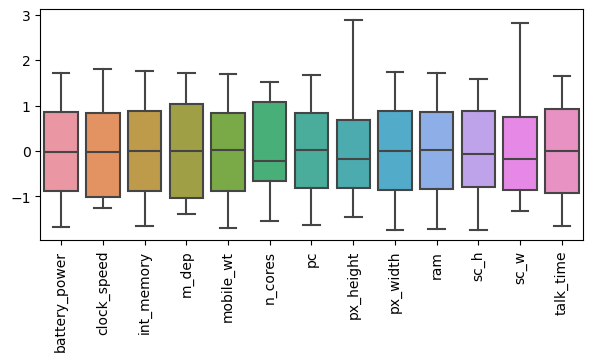

In [96]:
# Box plot for all columns after normalization
plt.figure(figsize=(7, 3))
sns.boxplot(data=dataset[features_to_normalize])
plt.xticks(rotation=90)
plt.show()

Data Preparation

In [97]:
# Define features (X) and target (y)
X = dataset[['ram', 'battery_power', 'px_width', 'px_height', 'mobile_wt', 'blue']]  # Use double brackets to select multiple columns
y = dataset['price_range']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the shape of the training and testing data
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1595, 6) (399, 6) (1595,) (399,)


Train the XGBoost Classifier

In [98]:
# Initialize the model
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Train the model
model.fit(X_train, y_train)

c:\Users\assem\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:12:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

Make Predictions and Evaluate the Model

In [99]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Classification report for detailed metrics
print(classification_report(y_test, y_pred))

# Confusion matrix
print(confusion_matrix(y_test, y_pred))

Accuracy: 93.48%
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       103
           1       0.93      0.90      0.91       100
           2       0.90      0.90      0.90       100
           3       0.95      0.96      0.95        96

    accuracy                           0.93       399
   macro avg       0.93      0.93      0.93       399
weighted avg       0.93      0.93      0.93       399

[[101   2   0   0]
 [  4  90   6   0]
 [  0   5  90   5]
 [  0   0   4  92]]


<Figure size 1000x800 with 0 Axes>

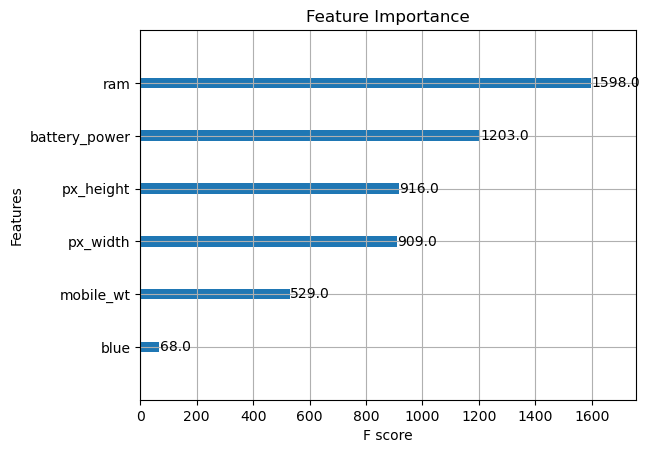

In [100]:
# Plot feature importance
plt.figure(figsize=(10, 8))
plot_importance(model, importance_type='weight')
plt.title('Feature Importance')
plt.show()

Hyperparameter Tuning

In [101]:
# # Define hyperparameters to tune
# param_grid = {
#     'learning_rate': [0.01, 0.1, 0.2],
#     'max_depth': [3, 5, 7],
#     'n_estimators': [100, 200, 300],
#     'subsample': [0.8, 1.0],
#     'colsample_bytree': [0.8, 1.0]
# }

# # Perform GridSearchCV
# grid_search = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'), param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=2)
# grid_search.fit(X_train, y_train)

# # Best parameters a71nd best score
# print(f'Best Parameters: {grid_search.best_params_}')
# print(f'Best Accuracy: {grid_search.best_score_}')

Set Up the Cross-Validation

In [102]:
# Initialize the XGBoost classifier
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Set up k-fold cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_results = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')

# Print cross-validation results
print(f"Cross-validation Accuracy Scores: {cv_results}")
print(f"Mean Accuracy: {cv_results.mean():.2f}")
print(f"Standard Deviation: {cv_results.std():.2f}")

c:\Users\assem\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:12:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\assem\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:12:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\assem\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:12:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\assem\anaconda3\Lib\site-packages\

Cross-validation Accuracy Scores: [0.92230576 0.9122807  0.92230576 0.91729323 0.9321608 ]
Mean Accuracy: 0.92
Standard Deviation: 0.01


Additional Metrics

In [103]:
# Perform cross-validation with multiple metrics
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
cv_results = cross_validate(model, X, y, cv=kfold, scoring=scoring)

# Print results for each metric
for metric in scoring:
    print(f"{metric.capitalize()}: {cv_results['test_' + metric].mean():.2f} (std: {cv_results['test_' + metric].std():.2f})")

c:\Users\assem\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:12:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\assem\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:12:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\assem\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:12:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\assem\anaconda3\Lib\site-packages\

Accuracy: 0.92 (std: 0.01)
Precision_macro: 0.92 (std: 0.01)
Recall_macro: 0.92 (std: 0.01)
F1_macro: 0.92 (std: 0.01)


Visualize Cross-Validation Performance

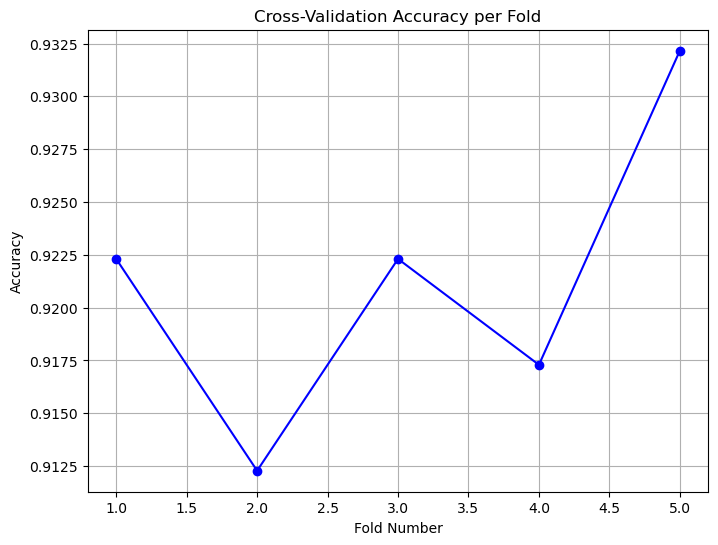

In [104]:
accuracy_scores = cv_results['test_accuracy']  # Extract accuracy scores

# Plot cross-validation results
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(accuracy_scores) + 1), accuracy_scores, marker='o', color='blue')
plt.title('Cross-Validation Accuracy per Fold')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()